In [1]:
%matplotlib inline
%config IPCompleter.greedy=True
import matplotlib.pyplot as plt
import os, sys
from obspy import read

from obspy.core.event import read_events
from obspy import read_inventory

## Event Data
Event catalog can be found [here](https://www.seis-insight.eu/en/science/seis-products/mqs-catalogs)

In [2]:
file_names = list(filter(lambda f: os.path.splitext(f)[1] == '.mseed', os.listdir('data/miniseed/')))

In [3]:
print(file_names[-1])
print(file_names[-2])
print(file_names[-3])
stream = read(os.path.join('data/miniseed', file_names[-1]))
# stream += read(os.path.join('data/miniseed', file_names[-2]))
# stream += read(os.path.join('data/miniseed', file_names[-3]))

ELYSE_00_HHV_2019-03-07T20:02:38.897000Z.mseed
ELYSE_02_MHU_2019-02-23T01:36:40.914000Z.mseed
ELYSE_05_HLW_2019-03-28T03:51:55.287000Z.mseed


In [4]:
type(stream[0])

obspy.core.trace.Trace

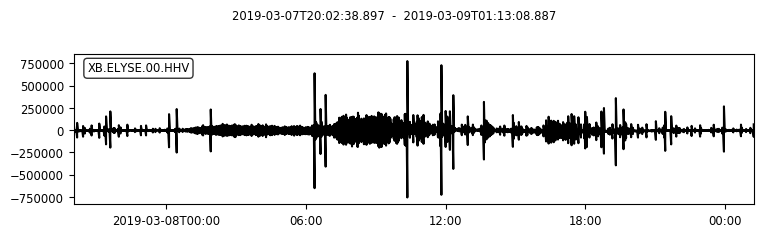

In [5]:
stream.plot()

In [6]:
events = read_events(os.path.join('data', 'events_extended_mars_preferredorigin_2020-01-01.xml'))

In [7]:
events[0]

Event:	2019-12-31T17:30:00.000000Z |  +4.502, +135.623 | 1.6 M2.4 | manual

	            resource_id: ResourceIdentifier(id="smi:insight.mqs/mqs2019zqjt")
	             event_type: 'other event'
	   event_type_certainty: 'suspected'
	          creation_info: CreationInfo(agency_id='mqs', author='scevent@sc3mars-op', creation_time=UTCDateTime(2020, 1, 6, 11, 24, 24, 297478))
	    preferred_origin_id: ResourceIdentifier(id="smi:insight.mqs/Origin/20200106112341.904572.33366")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:insight.mqs/Magnitude/20200403-145623/18947385")
	                   ---------
	     event_descriptions: 2 Elements
	                  picks: 7 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements


types: {'other event': 383}
type certainty {'suspected': 380, 'known': 3}


(array([  2.,  14.,   2.,   3., 114., 201.,  13.,   4.,   8.,   7.]),
 array([-0.6 , -0.17,  0.26,  0.69,  1.12,  1.55,  1.98,  2.41,  2.84,
         3.27,  3.7 ]),
 <a list of 10 Patch objects>)

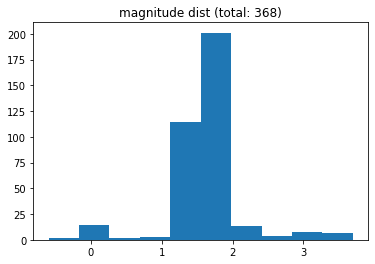

In [8]:
event_type_counts = {}
event_type_certainty_counts = {}
event_mags = []
print()
for event in events:
    count = event_type_counts.get(event.event_type, 0) + 1
    event_type_counts[event.event_type] = count
    
    count = event_type_certainty_counts.get(event.event_type_certainty, 0) + 1
    event_type_certainty_counts[event.event_type_certainty] = count
    
    if len(event.magnitudes) > 0:
        event_mags.append(event.magnitudes[0].mag)
    
print('types: {0}'.format(event_type_counts))
print('type certainty {0}'.format(event_type_certainty_counts))
plt.title('magnitude dist (total: {0})'.format(len(event_mags)))
plt.hist(event_mags)

In [15]:
# largest magnitude event
import numpy as np

mags = [] 
for event in events:
    if len(event.magnitudes) > 0:
        mags.append(event.magnitudes[0].mag)
        
max_mag = max(mags)
max_mag_idx = np.argmax(mags)
max_mag_time = events[156].picks[0].time
print('largest magnitude recorded: {0} (index: {1}) @ {2}'.format(max_mag, max_mag_idx, max_mag_time))

largest magnitude recorded: 3.7 (index: 156) @ 2019-06-05T03:45:25.293533Z


## Station Data
Station data can be found [here](https://www.seis-insight.eu/en/science/seis-data/seis-metadata-access)

In [16]:
station_inv = read_inventory(os.path.join('data','ELYSE_station.xml'), format="STATIONXML")

In [20]:
net = station_inv[0]
channels = net[0]
channels[4] 

Channel 'HHW', Location '00' 
	Time range: 2019-02-14T23:46:40.145000Z - 2019-02-23T06:18:45.299000Z
	Latitude: 4.50, Longitude: 135.62, Elevation: -2613.4 m, Local Depth: -0.1 m
	Azimuth: 255.00 degrees from north, clockwise
	Dip: -29.70 degrees down from horizontal
	Sampling Rate: 100.00 Hz
	Sensor (Description): VBB Velocity (VBB Velocity SCI mode)
	Response information available

In [5]:
e = read(os.path.join('data', 'ELYSE_02_3.7.mseed'))

FileNotFoundError: [Errno 2] No such file or directory: 'data/ELYSE_02_3.7.mseed'

In [97]:
type(e)

obspy.core.stream.Stream

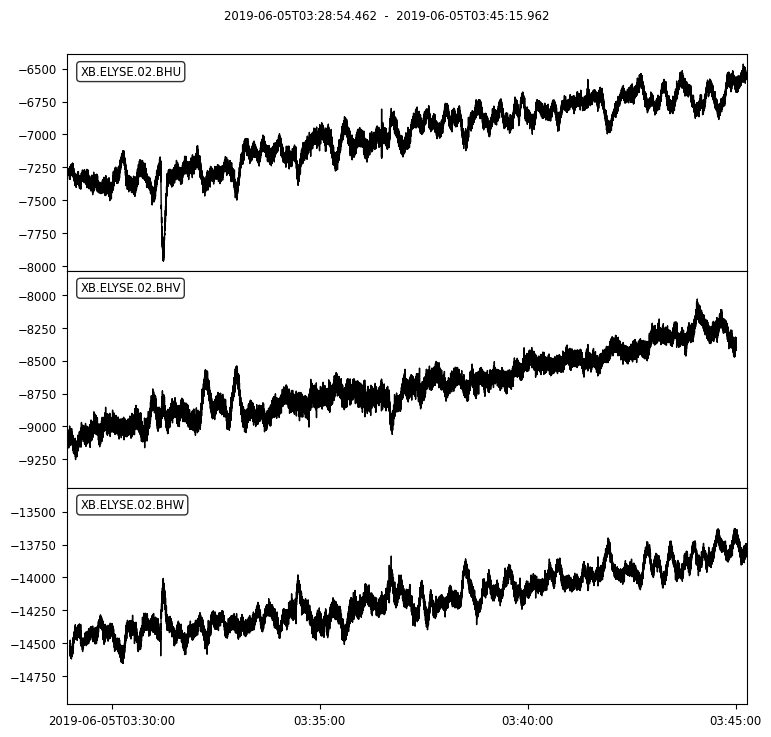

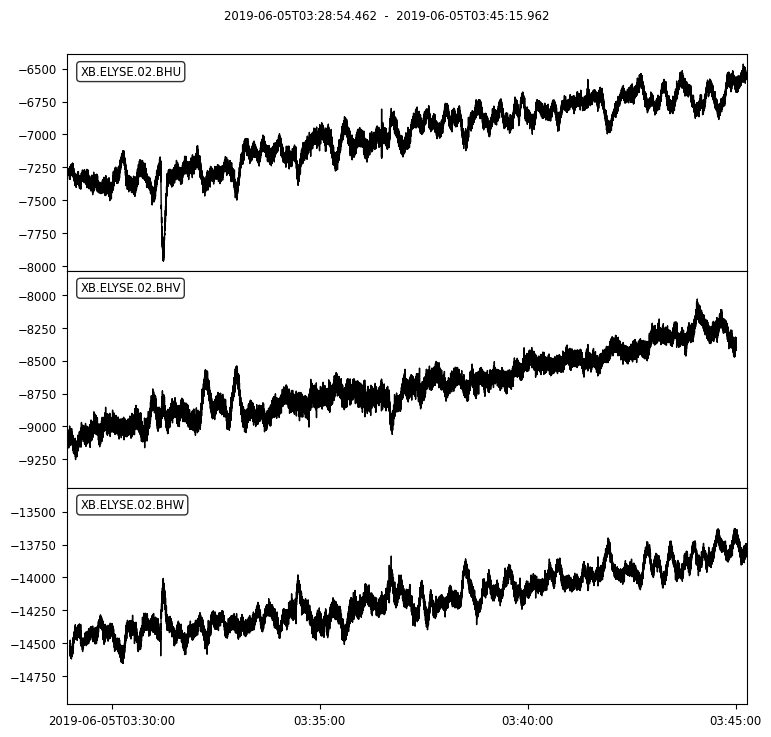

In [98]:
e.plot()

In [99]:
e.differentiate()

3 Trace(s) in Stream:
XB.ELYSE.02.BHU | 2019-06-05T03:28:57.712000Z - 2019-06-05T03:45:14.812000Z | 20.0 Hz, 19543 samples
XB.ELYSE.02.BHV | 2019-06-05T03:28:54.462000Z - 2019-06-05T03:45:01.212000Z | 20.0 Hz, 19336 samples
XB.ELYSE.02.BHW | 2019-06-05T03:28:59.462000Z - 2019-06-05T03:45:15.962000Z | 20.0 Hz, 19531 samples

In [100]:
e = read(os.path.join('data', 'ELYSE_00_3.7.mseed'))

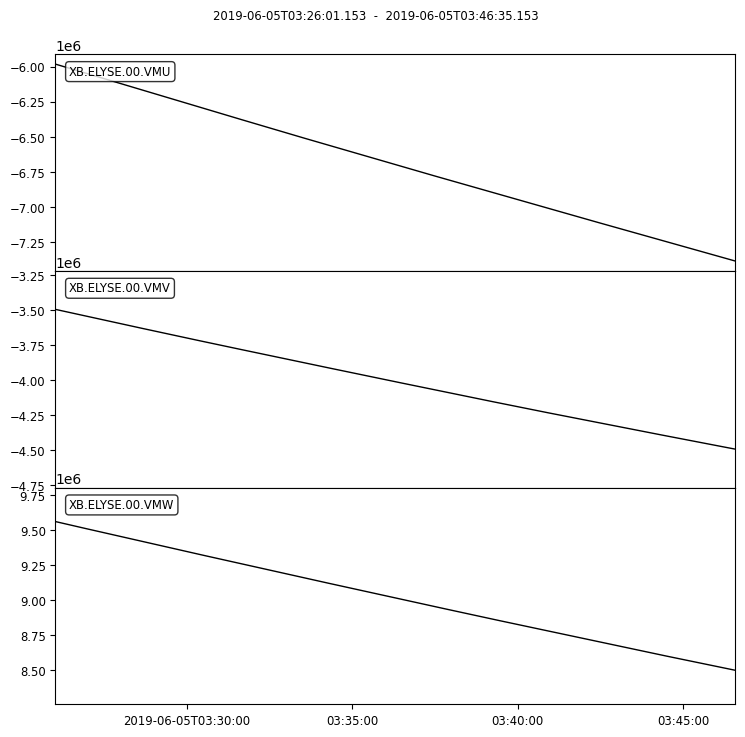

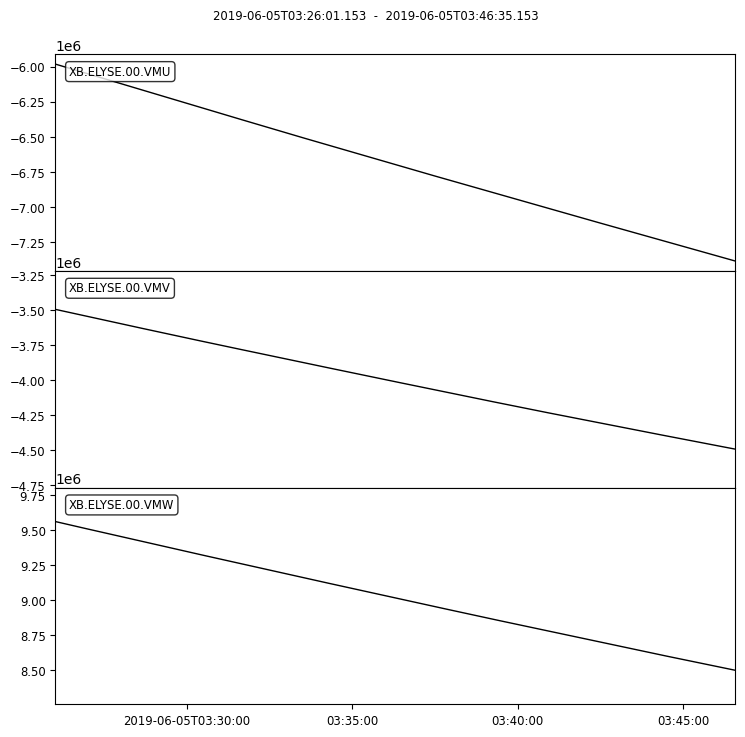

In [101]:
e.plot()

### url example
```
http://ws.ipgp.fr/fdsnws/dataselect/1/query?network=XB&amp;station=ELYSE&amp;startTime=2019-09-29T10:16:27&amp;endTime=2019-09-29T10:26:30&amp;location=00&amp;nodata=404
```

In [102]:
e.differentiate()

3 Trace(s) in Stream:
XB.ELYSE.00.VMU | 2019-06-05T03:26:01.153000Z - 2019-06-05T03:46:35.153000Z | 0.5 Hz, 618 samples
XB.ELYSE.00.VMV | 2019-06-05T03:26:01.153000Z - 2019-06-05T03:46:35.153000Z | 0.5 Hz, 618 samples
XB.ELYSE.00.VMW | 2019-06-05T03:26:01.153000Z - 2019-06-05T03:46:35.153000Z | 0.5 Hz, 618 samples